In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Data


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualizing Examples

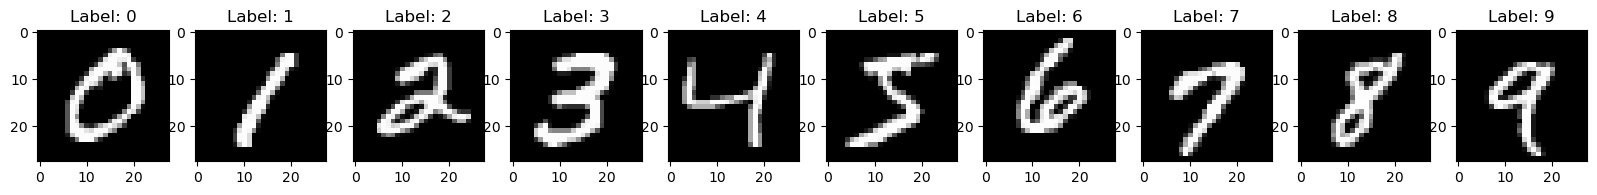

In [10]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20,20))
for i in range (0,num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=12)

In [12]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Data Preparation

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
x_train[0].shape

(28, 28)

In [18]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [19]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
x_test = x_test.reshape(x_test.shape[0], -1)

In [22]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
x_train.shape

(60000, 784)

In [24]:
x_test.shape

(10000, 784)

Model - Fully Connected Neural Network

In [27]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Dataset

In [29]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0470 - accuracy: 0.9860
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0369 - accuracy: 0.9891
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0327 - accuracy: 0.9906
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 10/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0186 - accura

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9785
Test Loss: 0.07728806883096695, Test Accuracy: 0.9785000085830688


In [31]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [32]:
y_pred

array([[9.3579873e-09, 3.4902212e-07, 2.7414387e-06, ..., 9.9998868e-01,
        1.6470986e-07, 3.4341676e-07],
       [2.3891519e-07, 1.4851060e-05, 9.9998462e-01, ..., 3.0697226e-12,
        1.9824537e-08, 1.2157911e-10],
       [8.8845349e-09, 9.9995613e-01, 2.5729571e-06, ..., 2.2808043e-05,
        5.1135116e-06, 3.3522320e-09],
       ...,
       [3.7691499e-14, 2.1026925e-09, 2.7828369e-13, ..., 1.9659762e-08,
        2.8900828e-11, 2.0495223e-09],
       [1.1539173e-11, 5.2839655e-12, 3.3254059e-12, ..., 1.0937465e-09,
        1.3330778e-06, 3.2818589e-12],
       [1.3508973e-09, 2.9436544e-13, 1.8541555e-12, ..., 2.0715275e-16,
        1.9887555e-12, 4.1123116e-13]], dtype=float32)

In [33]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Testing data at random

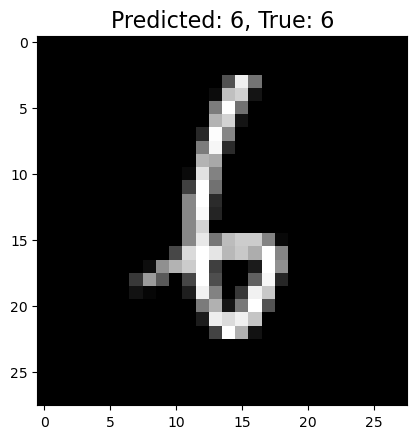

In [34]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Plotting Confusion Matrix

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

Error

In [37]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [38]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] 

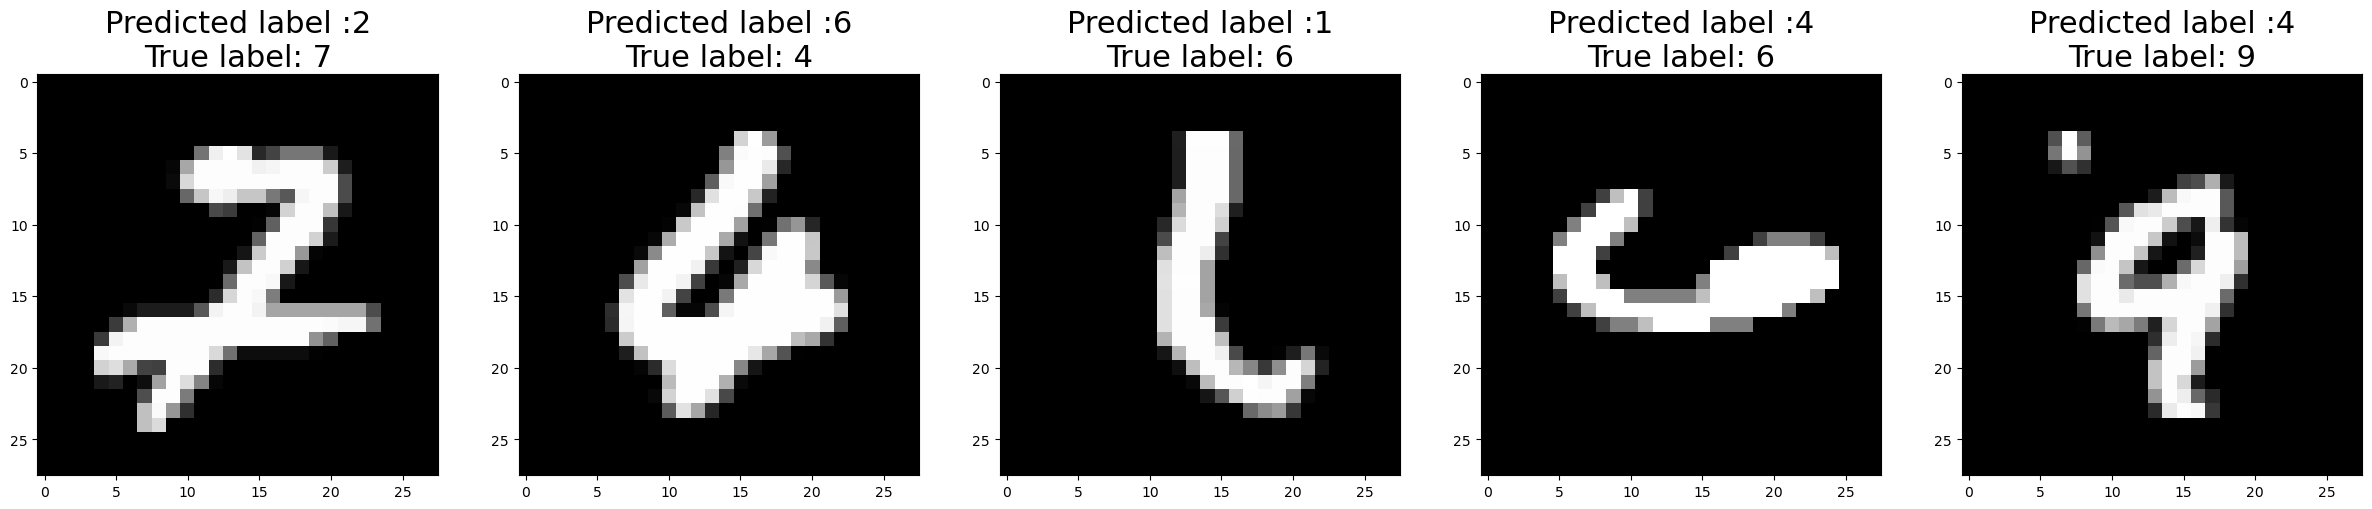

In [39]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)